<b> Autores: Adriana Zanol, Kalel Branco Chaves, Rafael Smiderle </b>
<br>Dataset utilizado:https://www.kaggle.com/rikdifos/credit-card-approval-prediction

In [336]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns
import matplotlib.pyplot as plt  
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
# Desativando os avisos sobre as bibliotecas depreciadas:


In [61]:
%config Completer.use_jedi = False

In [62]:
credit = pd.read_csv('https://raw.githubusercontent.com/rsmiderle/ds_ml_nao_supervisionado/master/k-means/credit_record.csv')

In [63]:
application = pd.read_csv('https://raw.githubusercontent.com/rsmiderle/ds_ml_nao_supervisionado/master/k-means/application_record.csv')

In [350]:
df_merge = pd.merge(application, credit, on='ID')

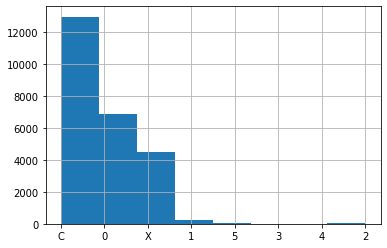

In [351]:
df_merge[df_merge['MONTHS_BALANCE'] == 0]['STATUS'].hist(bins=8)

<b>Nota-se que o dataset está desbalanceado pra caramba

<h2><b>Aplicando técnicas de under para resolver o problema de balanceamento

<b> trabalhando somente com o mês corrente

In [352]:
df_merge = df_merge[df_merge['MONTHS_BALANCE'] == 0]

In [353]:
#remover "X" pois distorce as previsões de bons e maus pagadores
df_merge = df_merge[df_merge['STATUS'] != 'X' ]

In [354]:
df_merge['STATUS'].replace(to_replace=['1','2','3','4'], value='5', inplace=True)

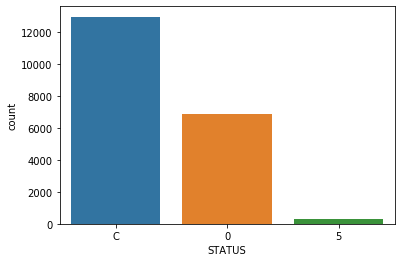

In [355]:
#verificando como anda o balanceamento depois desses filtros
#faz sentido ter aumentado o desbalanceamento pois o status 5, que é o mais atrasado, tende a se repetir nos meses anteriores que foram eliminados da análise
sns.countplot(df_merge['STATUS'])

In [263]:
#!pip install imblearnb

In [356]:
df_merge['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [357]:
#para nosso trabalho, consideramos casamento e casamento civil como mesmo status
df_merge['NAME_FAMILY_STATUS'].replace(to_replace='Civil marriage', value='Married', inplace=True)

In [358]:
df_merge.OCCUPATION_TYPE = df_merge.OCCUPATION_TYPE.fillna("uninformed")

<b>Transformando categóricas

In [359]:
dummies = pd.get_dummies(df_merge).copy()

In [268]:
!pip install scikit-plot

In [360]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt
# separar variáveis entre X e y
Xa = teste_under.drop('STATUS_5', axis=1)
ya = teste_under['STATUS_5']

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9840    1.0000    0.9919      4966
           1     0.0000    0.0000    0.0000        81

    accuracy                         0.9840      5047
   macro avg     0.4920    0.5000    0.4960      5047
weighted avg     0.9682    0.9840    0.9760      5047

Acurácia: 0.9840



d:\Users\smide\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


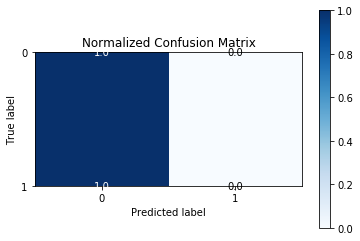

In [361]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, stratify=ya, shuffle=True)
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

<b>Devido ao desbalanceamento, o próximo passo foi fazer um undersample para balancear o dataset

In [362]:
from imblearn.over_sampling import SMOTE, ADASYN
#nr = SMOTE()
nr = NearMiss()
X1, y1 = nr.fit_resample(Xa, ya)

In [363]:
y1.count()

650

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt
# separar variáveis entre X e y
Xa = teste_under.drop('STATUS_5', axis=1)
ya = teste_under['STATUS_5']

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9840    1.0000    0.9919      4966
           1     0.0000    0.0000    0.0000        81

    accuracy                         0.9840      5047
   macro avg     0.4920    0.5000    0.4960      5047
weighted avg     0.9682    0.9840    0.9760      5047

Acurácia: 0.9840



d:\Users\smide\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


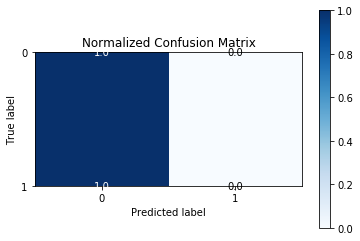

In [366]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, stratify=ya, shuffle=True)
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

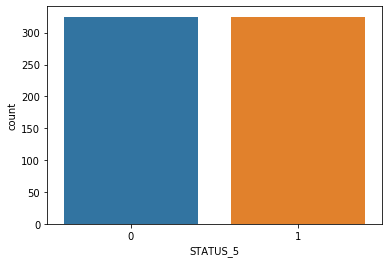

In [272]:
sns.countplot(y1)

In [273]:
#df passa a ser o dataset final contendo o merge, a distribuição igualitária de STATUS_5 e com a transformação de todas as variáveis categóricas
df = df_undersampled.copy()

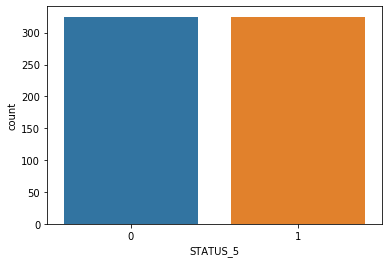

In [275]:
sns.countplot(x='STATUS_5', data=df)

In [276]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,STATUS_0,STATUS_C,STATUS_5
count,650.000000,650.000000,650.000000,650.000000,650.0,650.000000,650.00000,650.000000,650.000000,650.0,...,650.000000,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.287692,169075.114615,-17398.270769,132981.960000,1.0,0.127692,0.30000,0.116923,2.023077,0.0,...,0.001538,0.003077,0.083077,0.0,0.018462,0.003077,0.456923,0.153846,0.346154,0.500000
std,0.609632,87301.809438,4689.592080,177257.697676,0.0,0.334004,0.45861,0.321576,0.829589,0.0,...,0.039223,0.055427,0.276211,0.0,0.134717,0.055427,0.498525,0.361079,0.476109,0.500385
min,0.000000,45000.000000,-24611.000000,-12870.000000,1.0,0.000000,0.00000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,135000.000000,-22123.000000,-1812.000000,1.0,0.000000,0.00000,0.000000,2.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,135000.000000,-17401.000000,-701.500000,1.0,0.000000,0.00000,0.000000,2.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,180000.000000,-13299.000000,365243.000000,1.0,0.000000,1.00000,0.000000,2.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,4.000000,900000.000000,-8054.000000,365243.000000,1.0,1.000000,1.00000,1.000000,6.000000,0.0,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b> Organizando os labels em df2

In [277]:
df2 = df.drop(columns=['STATUS_0', 'STATUS_C'])

In [278]:
df2.rename(columns={'STATUS_5':'BAD_SCORE'}, inplace=True)
df2.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,BAD_SCORE
0,0,103500.0,-10396,-564,1,0,0,1,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,103500.0,-10396,-564,1,0,0,1,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,306000.0,-18927,-2978,1,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,202500.0,-17585,-3017,1,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,202500.0,-17585,-3017,1,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
#eliminando features que não sofrem variação 
df3 = pd.DataFrame(df2.nunique())
df3[df3[0] == 1].index
df2.drop(columns=df3[df3[0] == 1].index, inplace=True)
df2.drop(columns=['CODE_GENDER_M'], inplace=True)
df2.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,FLAG_OWN_CAR_N,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,BAD_SCORE
0,0,103500.0,-10396,-564,0,0,1,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,103500.0,-10396,-564,0,0,1,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,306000.0,-18927,-2978,0,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,202500.0,-17585,-3017,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,202500.0,-17585,-3017,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
#removendo features que são excludentes entre si e deixando apenas uma.
#exemplo: FLAG_OWN_CAR_N e FLAG_OWN_CAR_Y
df2.drop(columns=['FLAG_OWN_CAR_N','FLAG_OWN_REALTY_N'], inplace=True)
df2.rename(columns={'FLAG_OWN_CAR_N' : 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY_N': 'FLAG_OWN_REALTY'}, inplace=True)
df2.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,BAD_SCORE
0,0,103500.0,-10396,-564,0,0,1,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,103500.0,-10396,-564,0,0,1,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,306000.0,-18927,-2978,0,0,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,202500.0,-17585,-3017,0,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,202500.0,-17585,-3017,0,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0


<b> Normalizando

In [282]:
from sklearn import preprocessing
temp = df2.copy()

standardScaler = preprocessing.StandardScaler()
data_scaled = standardScaler.fit_transform() fit_transform(temp)

In [283]:
df_scaled = pd.DataFrame(data_scaled)

In [284]:
df_scaled.columns = df2.columns

In [285]:
df_scaled.head(10)

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,BAD_SCORE
0,-0.472275,-0.751710,1.494301,-0.753980,-0.382602,-0.654654,2.748205,-0.027839,0.647467,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
1,-0.472275,-0.751710,1.494301,-0.753980,-0.382602,-0.654654,2.748205,-0.027839,0.647467,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
2,-0.472275,1.569616,-0.326234,-0.767609,-0.382602,-0.654654,-0.363874,-0.027839,0.647467,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
3,-0.472275,0.383161,-0.039848,-0.767830,-0.382602,-0.654654,-0.363874,-0.027839,-1.544479,1.452600,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
4,-0.472275,0.383161,-0.039848,-0.767830,-0.382602,-0.654654,-0.363874,-0.027839,-1.544479,1.452600,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
5,-0.472275,0.383161,-0.039848,-0.767830,-0.382602,-0.654654,-0.363874,-0.027839,-1.544479,1.452600,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
6,-0.472275,-0.390615,-1.215482,1.311311,-0.382602,1.527525,-0.363874,-0.027839,-1.544479,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,1.090207,-1.0
7,-0.472275,-0.390615,-1.215482,1.311311,-0.382602,1.527525,-0.363874,-0.027839,-1.544479,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,1.090207,-1.0
8,-0.472275,-0.390615,-1.215482,1.311311,-0.382602,1.527525,-0.363874,-0.027839,-1.544479,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,1.090207,-1.0
9,-0.472275,-0.390615,-1.226366,1.311311,-0.382602,-0.654654,-0.363874,-0.027839,0.647467,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,1.090207,-1.0


In [290]:
df_scaled['BAD_SCORE'].unique()

array([-1.,  1.])

In [303]:

df_scaled.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,BAD_SCORE
0,-0.472275,-0.751710,1.494301,-0.753980,-0.382602,-0.654654,2.748205,-0.027839,0.647467,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
1,-0.472275,-0.751710,1.494301,-0.753980,-0.382602,-0.654654,2.748205,-0.027839,0.647467,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
2,-0.472275,1.569616,-0.326234,-0.767609,-0.382602,-0.654654,-0.363874,-0.027839,0.647467,-0.688421,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
3,-0.472275,0.383161,-0.039848,-0.767830,-0.382602,-0.654654,-0.363874,-0.027839,-1.544479,1.452600,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0
4,-0.472275,0.383161,-0.039848,-0.767830,-0.382602,-0.654654,-0.363874,-0.027839,-1.544479,1.452600,...,-0.096523,-0.24568,-0.182719,-0.039253,-0.055556,-0.301005,-0.137145,-0.055556,-0.917257,-1.0


In [367]:
data = df_scaled.iloc[:,[1,2,3]].values
data

array([[-0.75170968,  1.49430126, -0.75398027],
       [-0.75170968,  1.49430126, -0.75398027],
       [ 1.56961619, -0.32623446, -0.76760935],
       ...,
       [ 5.79958779,  0.81760231, -0.75742988],
       [ 6.83128818,  1.10996357, -0.75753715],
       [ 8.37883876,  1.60249627, -0.75644186]])

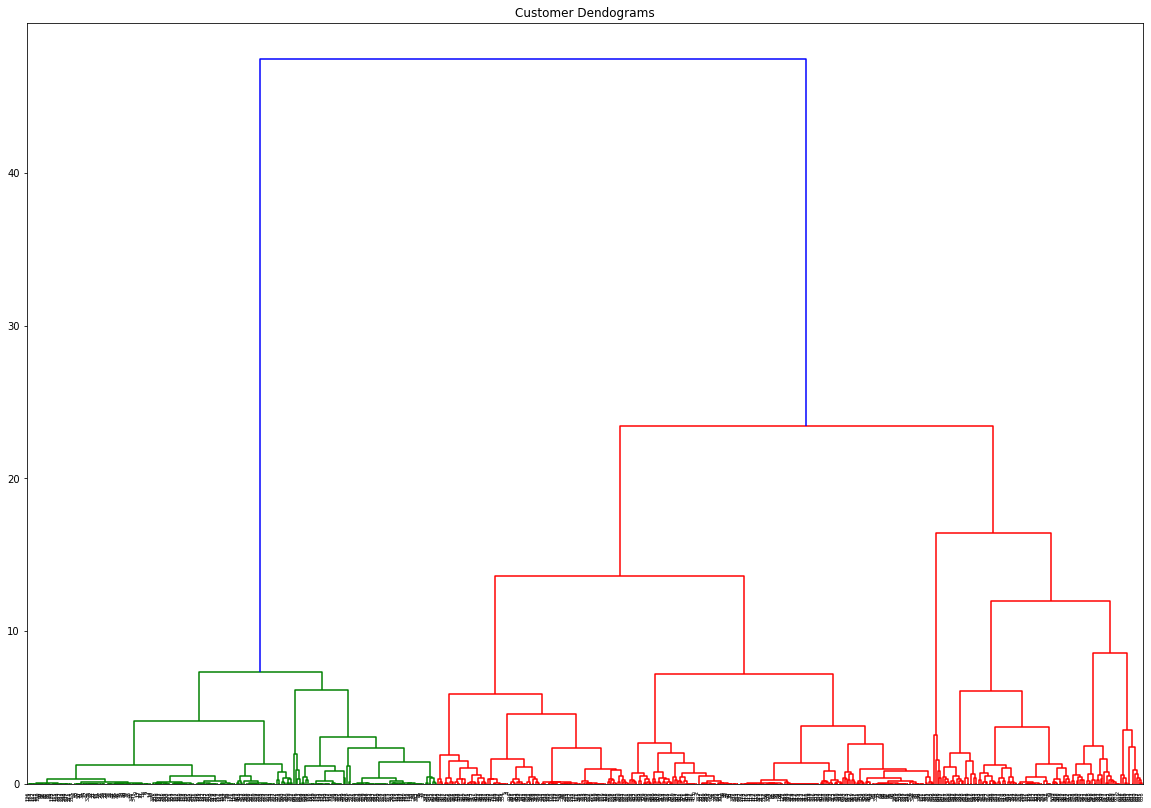

In [368]:
plt.figure(figsize=(20, 14))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [372]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
#options: ward, complete, average, single
cluster.fit_predict(data)  


array([2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,

Text(0, 0.5, 'Qtn Children')

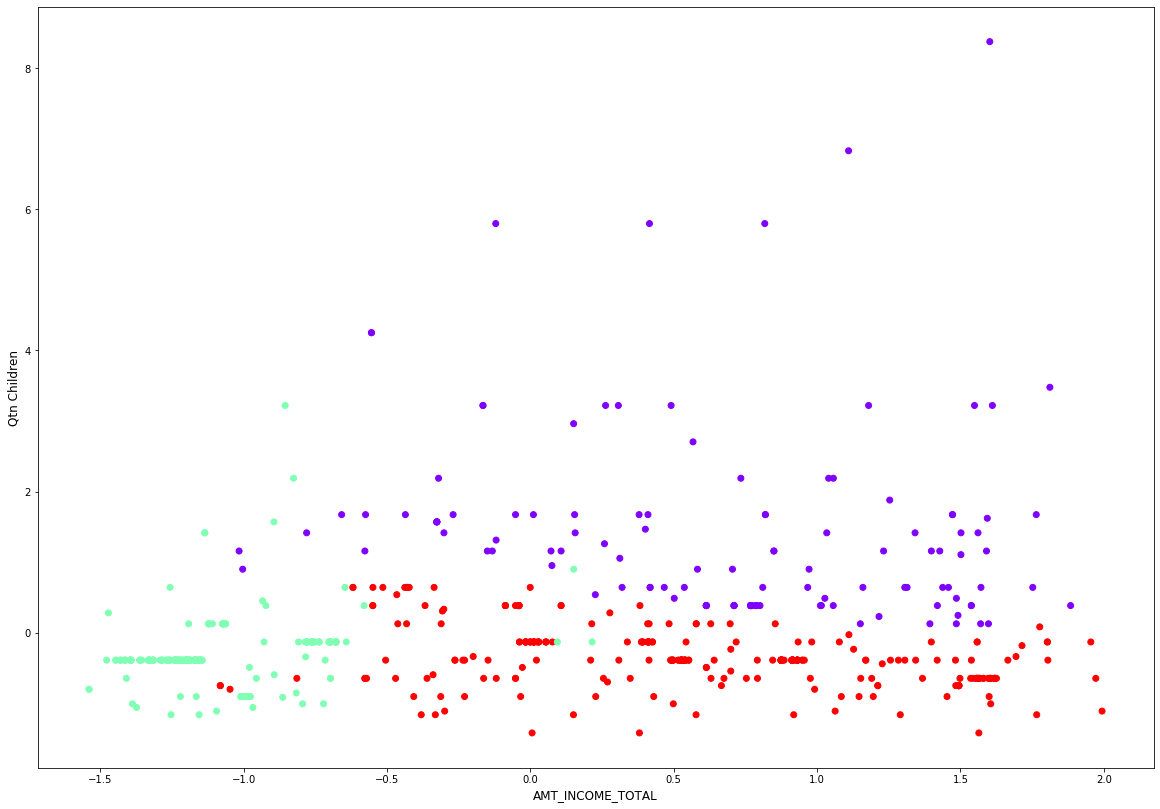

In [373]:
plt.figure(figsize=(20, 14))  
plt.scatter(data[:,1], data[:,0], c=cluster.labels_, cmap='rainbow')  
plt.xlabel("AMT_INCOME_TOTAL", fontsize=12)
plt.ylabel("Qtn Children", fontsize=12)